In [5]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

In [6]:
# Load the dataset
dataset = pd.read_csv("Data/ev_charging_patterns.csv")
dataset

,User ID,Vehicle Model,Battery Capacity (kWh),Charging Station ID,Charging Station Location,Charging Start Time,Charging End Time,Energy Consumed (kWh),Charging Duration (hours),Charging Rate (kW),Charging Cost (USD),Time of Day,Day of Week,State of Charge (Start %),State of Charge (End %),Distance Driven (since last charge) (km),Temperature (°C),Vehicle Age (years),Charger Type,User Type
0,User_1,BMW i3,108.463007,Station_391,Houston,01/01/2024 0:00,01/01/2024 0:39,60.712346,0.591363,36.389181,13.087717,Evening,Tuesday,29.371576,86.119962,293.602111,27.947953,2.0,DC Fast Charger,Commuter
1,User_2,Hyundai Kona,100.000000,Station_428,San Francisco,01/01/2024 1:00,01/01/2024 3:01,12.339275,3.133652,30.677735,21.128448,Morning,Monday,10.115778,84.664344,112.112804,14.311026,3.0,Level 1,Casual Driver
2,User_3,Chevy Bolt,75.000000,Station_181,San Francisco,01/01/2024 2:00,01/01/2024 4:48,19.128876,2.452653,27.513593,35.667270,Morning,Thursday,6.854604,69.917615,71.799253,21.002002,2.0,Level 2,Commuter
3,User_4,Hyundai Kona,50.000000,Station_327,Houston,01/01/2024 3:00,01/01/2024 6:42,79.457824,1.266431,32.882870,13.036239,Evening,Saturday,83.120003,99.624328,199.577785,38.316313,1.0,Level 1,Long-Distance Traveler
4,User_5,Hyundai Kona,50.000000,Station_108,Los Angeles,01/01/2024 4:00,01/01/2024 5:46,19.629104,2.019765,10.215712,10.161471,Morning,Saturday,54.258950,63.743786,203.661847,-7.834199,1.0,Level 1,Long-Distance Traveler
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1315,User_1316,Nissan Leaf,100.000000,Station_57,New York,24/02/2024 19:00,24/02/2024 20:30,42.011654,1.426444,5.895475,22.081164,Evening,Sunday,39.204102,83.915952,239.601075,1.919655,7.0,DC Fast Charger,Commuter
1316,User_1317,BMW i3,100.000000,Station_40,New York,24/02/2024 20:00,24/02/2024 20:44,68.185853,3.238212,18.388012,5.067806,Evening,Tuesday,31.456375,93.096461,164.376022,34.029775,4.0,Level 2,Casual Driver
1317,User_1318,Nissan Leaf,100.000000,Station_374,New York,24/02/2024 21:00,24/02/2024 23:03,18.895102,3.267122,45.482066,37.255002,Evening,Tuesday,71.903081,78.678879,226.519258,20.358761,5.0,DC Fast Charger,Commuter
1318,User_1319,Chevy Bolt,85.000000,Station_336,San Francisco,24/02/2024 22:00,24/02/2024 23:20,13.756251,2.754527,38.148183,39.046146,Afternoon,Sunday,76.187997,65.926573,291.494076,24.134598,5.0,Level 2,Commuter


In [7]:
# Dataset information
dataset.info()        

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1320 entries, 0 to 1319
Data columns (total 20 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   User ID                                   1320 non-null   object 
 1   Vehicle Model                             1320 non-null   object 
 2   Battery Capacity (kWh)                    1320 non-null   float64
 3   Charging Station ID                       1320 non-null   object 
 4   Charging Station Location                 1320 non-null   object 
 5   Charging Start Time                       1320 non-null   object 
 6   Charging End Time                         1320 non-null   object 
 7   Energy Consumed (kWh)                     1254 non-null   float64
 8   Charging Duration (hours)                 1320 non-null   float64
 9   Charging Rate (kW)                        1254 non-null   float64
 10  Charging Cost (USD)                 

In [8]:
# statistics for each columns
dataset.describe()  

,Battery Capacity (kWh),Energy Consumed (kWh),Charging Duration (hours),Charging Rate (kW),Charging Cost (USD),State of Charge (Start %),State of Charge (End %),Distance Driven (since last charge) (km),Temperature (°C),Vehicle Age (years)
count,1320.000000,1254.000000,1320.000000,1254.000000,1320.000000,1320.000000,1320.000000,1254.000000,1320.000000,1320.000000
mean,74.534692,42.642894,2.269377,25.963003,22.551352,49.130012,75.141590,153.596788,15.263591,3.612843
std,20.626914,22.411705,1.061037,14.011326,10.751494,24.074134,17.080580,86.004987,14.831216,2.309824
min,1.532807,0.045772,0.095314,1.472549,0.234317,2.325959,7.604224,0.862361,-10.724770,0.000000
25%,62.000000,23.881193,1.397623,13.856583,13.368141,27.786903,62.053266,79.445335,2.800664,2.000000
50%,75.000000,42.691405,2.258136,25.603799,22.076360,48.241771,75.682496,152.259867,14.630846,4.000000
75%,85.000000,61.206218,3.112806,37.502998,31.646044,69.277921,88.201370,226.073284,27.981810,6.000000
max,193.003074,152.238758,7.635145,97.342255,69.407743,152.489761,177.708666,398.364775,73.169588,11.688592


In [9]:
dataset['Battery Capacity (kWh)'].describe()

count    1320.000000
mean       74.534692
std        20.626914
min         1.532807
25%        62.000000
50%        75.000000
75%        85.000000
max       193.003074
Name: Battery Capacity (kWh), dtype: float64

In [10]:
dataset.shape
#row , coulmns 

(1320, 20)

In [11]:
# column names of the dataset
dataset.columns


Index(['User ID', 'Vehicle Model', 'Battery Capacity (kWh)',
       'Charging Station ID', 'Charging Station Location',
       'Charging Start Time', 'Charging End Time', 'Energy Consumed (kWh)',
       'Charging Duration (hours)', 'Charging Rate (kW)',
       'Charging Cost (USD)', 'Time of Day', 'Day of Week',
       'State of Charge (Start %)', 'State of Charge (End %)',
       'Distance Driven (since last charge) (km)', 'Temperature (°C)',
       'Vehicle Age (years)', 'Charger Type', 'User Type'],
      dtype='object')

In [12]:
#  Fill missing values with the mean of each column
dataset.fillna(dataset.mean(numeric_only=True).round(1), inplace=True)
print("Data after handling missing values:")
print(dataset.head())# Shows the first few rows

Data after handling missing values:
  User ID Vehicle Model  Battery Capacity (kWh) Charging Station ID  \
0  User_1        BMW i3              108.463007         Station_391   
1  User_2  Hyundai Kona              100.000000         Station_428   
2  User_3    Chevy Bolt               75.000000         Station_181   
3  User_4  Hyundai Kona               50.000000         Station_327   
4  User_5  Hyundai Kona               50.000000         Station_108   

  Charging Station Location Charging Start Time Charging End Time  \
0                   Houston     01/01/2024 0:00   01/01/2024 0:39   
1             San Francisco     01/01/2024 1:00   01/01/2024 3:01   
2             San Francisco     01/01/2024 2:00   01/01/2024 4:48   
3                   Houston     01/01/2024 3:00   01/01/2024 6:42   
4               Los Angeles     01/01/2024 4:00   01/01/2024 5:46   

   Energy Consumed (kWh)  Charging Duration (hours)  Charging Rate (kW)  \
0              60.712346                   0.59

In [13]:
# Check for missing values
print("Missing values in each column:")
print(dataset.isnull().sum())

Missing values in each column:
User ID                                     0
Vehicle Model                               0
Battery Capacity (kWh)                      0
Charging Station ID                         0
Charging Station Location                   0
Charging Start Time                         0
Charging End Time                           0
Energy Consumed (kWh)                       0
Charging Duration (hours)                   0
Charging Rate (kW)                          0
Charging Cost (USD)                         0
Time of Day                                 0
Day of Week                                 0
State of Charge (Start %)                   0
State of Charge (End %)                     0
Distance Driven (since last charge) (km)    0
Temperature (°C)                            0
Vehicle Age (years)                         0
Charger Type                                0
User Type                                   0
dtype: int64


In [14]:
# Drop unused columns
# Specify the columns to drop
dataset.drop(['User ID'], axis=1, inplace=True)


In [15]:
dataset

,Vehicle Model,Battery Capacity (kWh),Charging Station ID,Charging Station Location,Charging Start Time,Charging End Time,Energy Consumed (kWh),Charging Duration (hours),Charging Rate (kW),Charging Cost (USD),Time of Day,Day of Week,State of Charge (Start %),State of Charge (End %),Distance Driven (since last charge) (km),Temperature (°C),Vehicle Age (years),Charger Type,User Type
0,BMW i3,108.463007,Station_391,Houston,01/01/2024 0:00,01/01/2024 0:39,60.712346,0.591363,36.389181,13.087717,Evening,Tuesday,29.371576,86.119962,293.602111,27.947953,2.0,DC Fast Charger,Commuter
1,Hyundai Kona,100.000000,Station_428,San Francisco,01/01/2024 1:00,01/01/2024 3:01,12.339275,3.133652,30.677735,21.128448,Morning,Monday,10.115778,84.664344,112.112804,14.311026,3.0,Level 1,Casual Driver
2,Chevy Bolt,75.000000,Station_181,San Francisco,01/01/2024 2:00,01/01/2024 4:48,19.128876,2.452653,27.513593,35.667270,Morning,Thursday,6.854604,69.917615,71.799253,21.002002,2.0,Level 2,Commuter
3,Hyundai Kona,50.000000,Station_327,Houston,01/01/2024 3:00,01/01/2024 6:42,79.457824,1.266431,32.882870,13.036239,Evening,Saturday,83.120003,99.624328,199.577785,38.316313,1.0,Level 1,Long-Distance Traveler
4,Hyundai Kona,50.000000,Station_108,Los Angeles,01/01/2024 4:00,01/01/2024 5:46,19.629104,2.019765,10.215712,10.161471,Morning,Saturday,54.258950,63.743786,203.661847,-7.834199,1.0,Level 1,Long-Distance Traveler
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1315,Nissan Leaf,100.000000,Station_57,New York,24/02/2024 19:00,24/02/2024 20:30,42.011654,1.426444,5.895475,22.081164,Evening,Sunday,39.204102,83.915952,239.601075,1.919655,7.0,DC Fast Charger,Commuter
1316,BMW i3,100.000000,Station_40,New York,24/02/2024 20:00,24/02/2024 20:44,68.185853,3.238212,18.388012,5.067806,Evening,Tuesday,31.456375,93.096461,164.376022,34.029775,4.0,Level 2,Casual Driver
1317,Nissan Leaf,100.000000,Station_374,New York,24/02/2024 21:00,24/02/2024 23:03,18.895102,3.267122,45.482066,37.255002,Evening,Tuesday,71.903081,78.678879,226.519258,20.358761,5.0,DC Fast Charger,Commuter
1318,Chevy Bolt,85.000000,Station_336,San Francisco,24/02/2024 22:00,24/02/2024 23:20,13.756251,2.754527,38.148183,39.046146,Afternoon,Sunday,76.187997,65.926573,291.494076,24.134598,5.0,Level 2,Commuter


In [16]:

# 6. Define the descriptive_statistics function

def descriptive_statistics(sample, field):
    stats = {
        "Mean": sample[field].mean(),
        "Median": sample[field].median(),
        "Standard Deviation": sample[field].std(),
        "Minimum": sample[field].min(),
        "Maximum": sample[field].max(),
        "Count": sample[field].count(),
    }
    return stats

In [17]:
# Display summary statistics
print("Summary statistics for numeric columns:")
print(dataset.describe())

Summary statistics for numeric columns:
       Battery Capacity (kWh)  Energy Consumed (kWh)  \
count             1320.000000            1320.000000   
mean                74.534692              42.640750   
std                 20.626914              21.843794   
min                  1.532807               0.045772   
25%                 62.000000              24.868084   
50%                 75.000000              42.600000   
75%                 85.000000              60.545496   
max                193.003074             152.238758   

       Charging Duration (hours)  Charging Rate (kW)  Charging Cost (USD)  \
count                1320.000000         1320.000000          1320.000000   
mean                    2.269377           25.964853            22.551352   
std                     1.061037           13.656282            10.751494   
min                     0.095314            1.472549             0.234317   
25%                     1.397623           14.431294            13.368

In [18]:
# Calculate descriptive statistics for "Charging Duration (hours)"
statistics = descriptive_statistics(dataset, "Charging Duration (hours)")
print(statistics)

{'Mean': 2.269377388966667, 'Median': 2.2581360735000002, 'Standard Deviation': 1.0610368257346885, 'Minimum': 0.095314417, 'Maximum': 7.635144759, 'Count': 1320}


In [19]:
# 7. Random Sampling and Applying Descriptive Statistics 
def random_sample_and_describe(data, field, sample_size=150):


    # Random sampling
    sample = data.sample(n=sample_size, random_state=42)  # Random state for reproducibility
    
    # Apply the descriptive_statistics function
    stats = descriptive_statistics(sample, field)
    return stats

# Specify the dependent variable for analysis (e.g., 'Charging Cost (USD)')
dependent_variable = "Charging Cost (USD)"


In [20]:
# Perform random sampling and calculate descriptive statistics
try:
    stats_result = random_sample_and_describe(dataset, dependent_variable)
    print(f"Descriptive Statistics for '{dependent_variable}' in the sample:")
    for key, value in stats_result.items():
        print(f"{key}: {value}")
except ValueError as e:
    print(e)

Descriptive Statistics for 'Charging Cost (USD)' in the sample:
Mean: 22.8091595553
Median: 22.228465385
Standard Deviation: 11.722871284094857
Minimum: 5.388237273
Maximum: 68.93168829
Count: 150


In [64]:
# 8. Systematic Sampling by 
# Define the dependent variable
dependent_variable = 'Charging Duration (hours)'

# Step 1: Systematic Sampling
def systematic_sampling(data, step_size, start_index=0):
    sample = []
    for i in range(start_index, len(data), step_size):
        sample.append(data.iloc[i])
    return pd.DataFrame(sample)

# Applying systematic sampling with step size 10
step_size = 10
sample_df = systematic_sampling(dataset, step_size)

# Descriptive statistics function (assuming it's already defined as 'descriptive_statistics')
def descriptive_statistics(data, column):
    return data[column].describe()

In [22]:
# 9.Descriptive Statistics for the dependent variable from the sample
desc_stats_sample = descriptive_statistics(sample_df, dependent_variable)
print("Descriptive Statistics for Sample:", desc_stats_sample)

Descriptive Statistics for Sample: count    132.000000
mean       2.200532
std        1.002455
min        0.182480
25%        1.416650
50%        2.172955
75%        2.965660
max        3.990952
Name: Charging Duration (hours), dtype: float64


In [23]:
#10 Visualizations


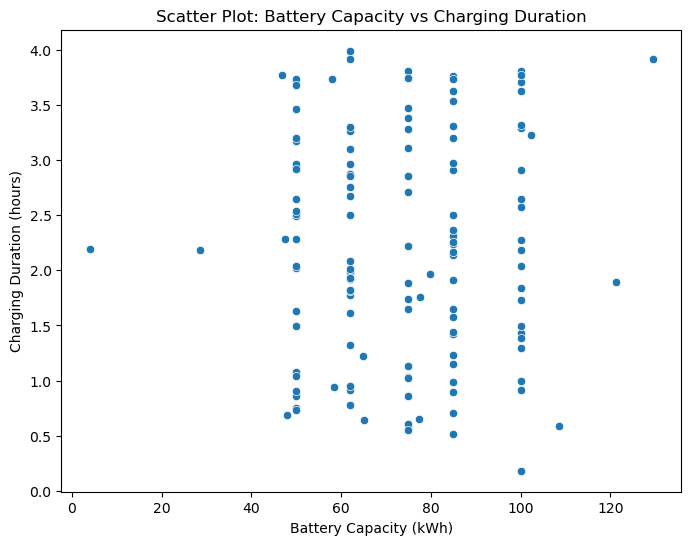

In [24]:
# a. Scatter plot
plt.figure(figsize=(8, 6))
sns.scatterplot(x='Battery Capacity (kWh)', y=dependent_variable, data=sample_df)
plt.title('Scatter Plot: Battery Capacity vs Charging Duration')
plt.xlabel('Battery Capacity (kWh)')
plt.ylabel('Charging Duration (hours)')
plt.show()

In [25]:
#displays the relationship between two continuous variables,'Battery Capacity (kWh)' and 'Charging Duration (hours)'. 
#Each point represents a data entry.
#To visually inspect whether there’s any correlation between the independent variable (Battery Capacity (kWh)) and the dependent variable (Charging Duration (hours)). 


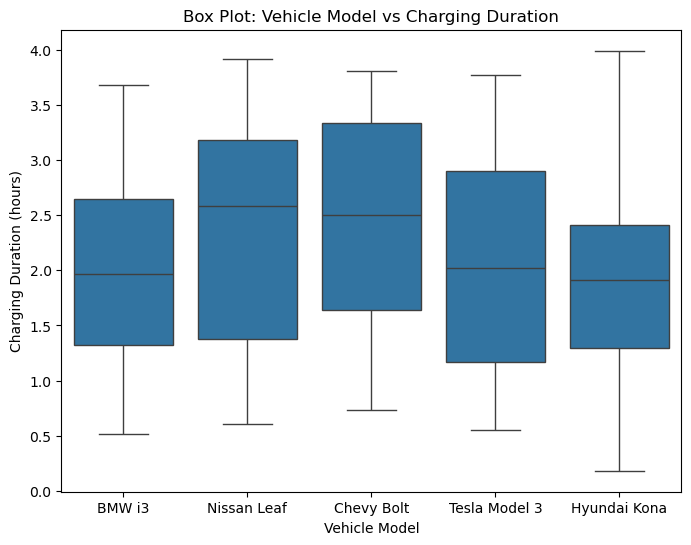

In [66]:

plt.figure(figsize=(8, 6))
sns.boxplot(x='Vehicle Model', y=dependent_variable, data=sample_df)
plt.title('Box Plot: Vehicle Model vs Charging Duration')
plt.xlabel('Vehicle Model')
plt.ylabel('Charging Duration (hours)')
plt.show()

In [27]:
#this Box plot shows the distribution of a dataset through five key statistics: the minimum, first quartile (Q1), median (Q2), third quartile (Q3), and maximum. 
#Outliers are often represented as points outside the "whiskers."
#Purpose: To compare the distribution of 'Charging Duration (hours)' across different categories of 'Vehicle Model'. The box plot helps in identifying the central tendency, spread, and any potential outliers for each vehicle model. It can be used to assess whether certain models have notably different charging durations.


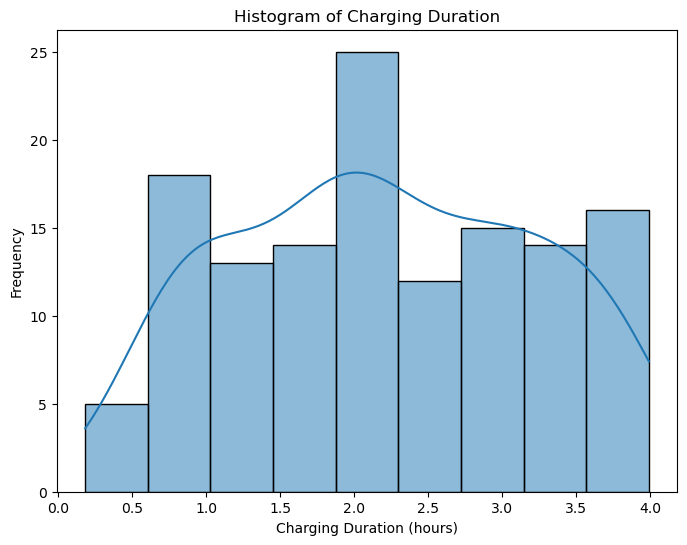

In [28]:
# c. Histogram
plt.figure(figsize=(8, 6))
sns.histplot(sample_df[dependent_variable], kde=True)
plt.title('Histogram of Charging Duration')
plt.xlabel('Charging Duration (hours)')
plt.ylabel('Frequency')
plt.show()

In [29]:
# histogram visualizes the distribution of a single variable. 
#The x-axis represents the bins (intervals) of the data, and the y-axis represents the frequency or count of data points in each bin.
#To understand the distribution of 'Charging Duration (hours)' in the sample. It shows whether the data is normally distributed (bell-shaped curve), skewed, or has multiple peaks (bimodal). 
#The KDE (Kernel Density Estimate) line smooths the histogram to give a better idea of the underlying distribution.

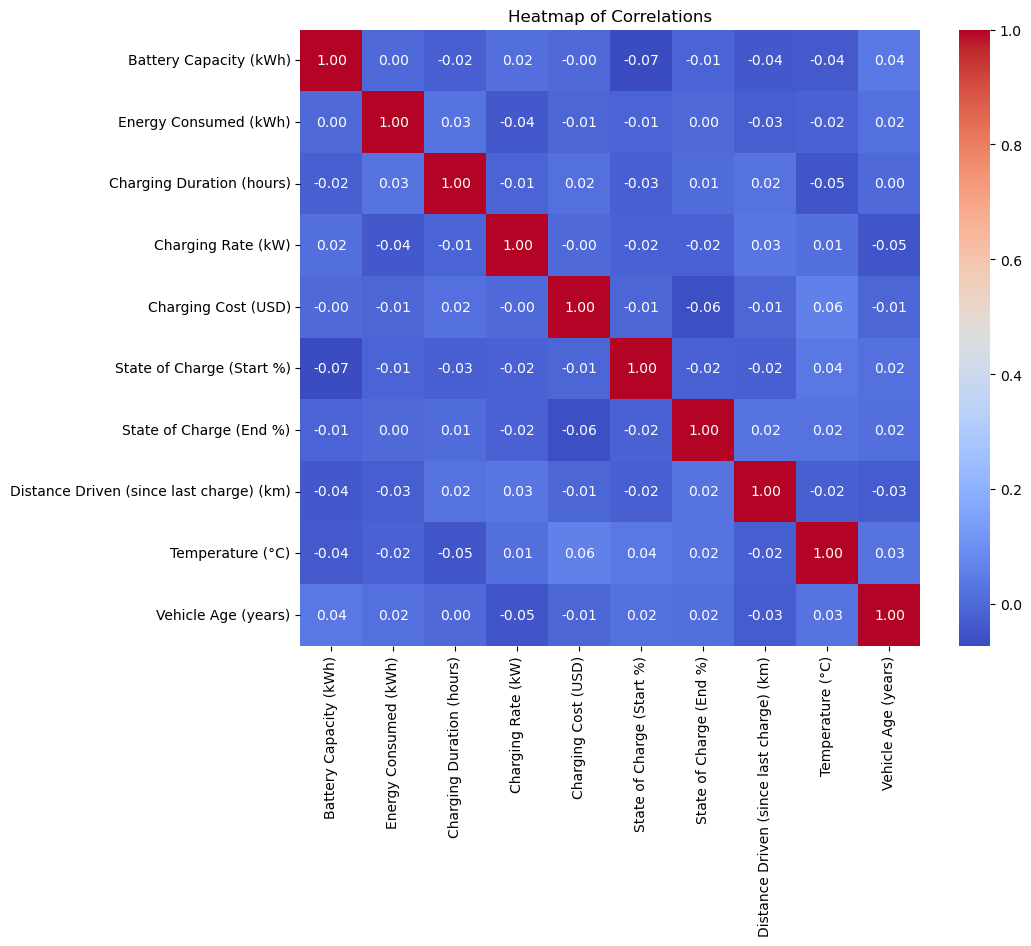

In [30]:
#Heat Map
# Select numeric columns
numeric_dataset = dataset.select_dtypes(include=['number'])

# Compute correlation matrix
correlation_matrix = numeric_dataset.corr()

# Plot the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Heatmap of Correlations')
plt.show()

In [31]:
# heatmap visualizes the correlation matrix of numeric variables. 
#Each square represents the correlation between two variables
#color gradients indicating the strength of the correlation (e.g., red for positive correlation, blue for negative correlation). 
#Annotations (annot=True) show the exact correlation values in each square.
#display how strongly the variables in the dataset are correlated with one another. The heatmap helps identify patterns and relationships.

In [32]:

# 11 Hypothesis Testing (Correlation)
# a. Pearson and Spearman correlation tests for a numerical variable (Battery Capacity)
battery_capacity = sample_df['Battery Capacity (kWh)']

# Pearson Correlation
pearson_corr, pearson_p_value = stats.pearsonr(battery_capacity, sample_df[dependent_variable])
print("Pearson Correlation: {pearson_corr}, P-value: {pearson_p_value}")

# Spearman Correlation
spearman_corr, spearman_p_value = stats.spearmanr(battery_capacity, sample_df[dependent_variable])
print("Spearman Correlation: {spearman_corr}, P-value: {spearman_p_value}")

# b. Chi-square test for categorical variable (Vehicle Model)
# First, we need to create a contingency table for the categorical variable
contingency_table = pd.crosstab(sample_df['Vehicle Model'], sample_df[dependent_variable].apply(lambda x: 'High' if x > sample_df[dependent_variable].median() else 'Low'))
chi2, p_value_chi2, dof, expected = stats.chi2_contingency(contingency_table)
print("Chi-Square Test: chi2 = {chi2}, p-value = {p_value_chi2}")


Pearson Correlation: {pearson_corr}, P-value: {pearson_p_value}
Spearman Correlation: {spearman_corr}, P-value: {spearman_p_value}
Chi-Square Test: chi2 = {chi2}, p-value = {p_value_chi2}


In [33]:
# 12 One-Sample T-Test to assess the representativeness of the sample
# Null hypothesis: The sample mean is equal to the population mean
population_mean = dataset[dependent_variable].mean()
sample_mean = sample_df[dependent_variable].mean()
t_stat, p_value_ttest = stats.ttest_1samp(sample_df[dependent_variable], population_mean)

print(f"One-Sample T-Test: t-statistic = {t_stat}, p-value = {p_value_ttest}")

One-Sample T-Test: t-statistic = -0.7890341192639728, p-value = 0.4315177597906992
